In [1]:
from sklearn.cluster import KMeans
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('files/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


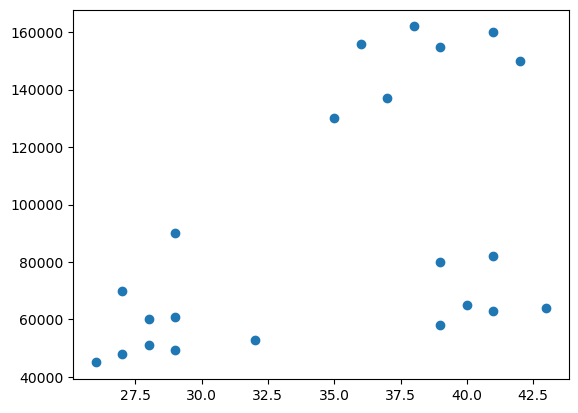

In [3]:
plt.scatter(df['Age'], df['Income($)'])

In [4]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [5]:
y_predict = km.fit_predict(df[['Age', 'Income($)']])
y_predict

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [6]:
df['cluster'] = y_predict
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


Text(0, 0.5, 'Income($)')

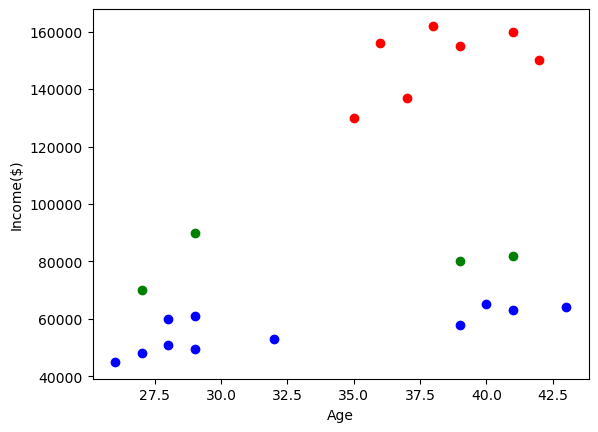

In [7]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='red')
plt.scatter(df3['Age'], df3['Income($)'], color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')


no dio bueno resultados, escalo los datos

In [8]:
print(df['Income($)'])

0      70000
1      90000
2      61000
3      60000
4     150000
5     155000
6     160000
7     162000
8     156000
9     130000
10    137000
11     45000
12     48000
13     51000
14     49500
15     53000
16     65000
17     63000
18     64000
19     80000
20     82000
21     58000
Name: Income($), dtype: int64


# MinMaxScaler

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [10]:
df.dtypes


Name         object
Age           int64
Income($)     int64
cluster       int32
dtype: object

In [11]:
scaler = MinMaxScaler(feature_range=(0,1),)
normal = df['Income($)'].values #convert to numpy array
income = scaler.fit_transform(normal.reshape(-1,1))

In [12]:
print(income)

[[0.21367521]
 [0.38461538]
 [0.13675214]
 [0.12820513]
 [0.8974359 ]
 [0.94017094]
 [0.98290598]
 [1.        ]
 [0.94871795]
 [0.72649573]
 [0.78632479]
 [0.        ]
 [0.02564103]
 [0.05128205]
 [0.03846154]
 [0.06837607]
 [0.17094017]
 [0.15384615]
 [0.16239316]
 [0.2991453 ]
 [0.31623932]
 [0.11111111]]


In [13]:
df['income'] = income

In [14]:
df.head()

,Name,Age,Income($),cluster,income
0,Rob,27,70000,0,0.213675
1,Michael,29,90000,0,0.384615
2,Mohan,29,61000,2,0.136752
3,Ismail,28,60000,2,0.128205
4,Kory,42,150000,1,0.897436


In [15]:
scaler_age = MinMaxScaler(feature_range=(0,1),)
normal = df['Age'].values #convert to numpy array
income = scaler.fit_transform(normal.reshape(-1,1))

In [16]:
df['age'] = income
df.head()

,Name,Age,Income($),cluster,income,age
0,Rob,27,70000,0,0.213675,0.058824
1,Michael,29,90000,0,0.384615,0.176471
2,Mohan,29,61000,2,0.136752,0.176471
3,Ismail,28,60000,2,0.128205,0.117647
4,Kory,42,150000,1,0.897436,0.941176


In [17]:
df = df.drop(['Age', 'Income($)'], axis = 1 )


In [18]:
df.head()

,Name,cluster,income,age
0,Rob,0,0.213675,0.058824
1,Michael,0,0.384615,0.176471
2,Mohan,2,0.136752,0.176471
3,Ismail,2,0.128205,0.117647
4,Kory,1,0.897436,0.941176


In [19]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['age', 'income']])
y_predicted

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [22]:
print(km.inertia_)

0.4750783498553096


In [20]:
df['cluster'] = y_predicted
df

,Name,cluster,income,age
0,Rob,1,0.213675,0.058824
1,Michael,1,0.384615,0.176471
2,Mohan,1,0.136752,0.176471
3,Ismail,1,0.128205,0.117647
4,Kory,0,0.897436,0.941176
5,Gautam,0,0.940171,0.764706
6,David,0,0.982906,0.882353
7,Andrea,0,1.000000,0.705882
8,Brad,0,0.948718,0.588235
9,Angelina,0,0.726496,0.529412


Text(0, 0.5, 'Income($)')

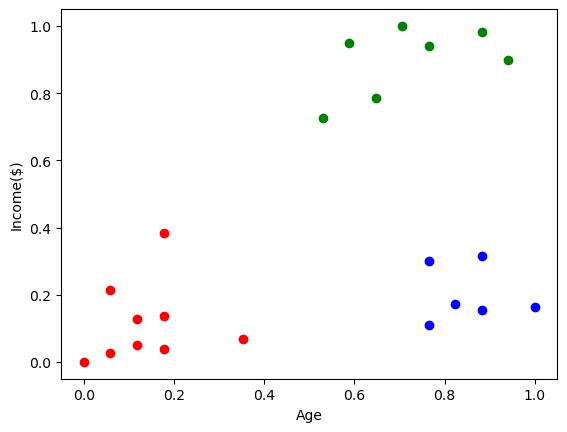

In [21]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

plt.scatter(df1['age'], df1['income'], color='green')
plt.scatter(df2['age'], df2['income'], color='red')
plt.scatter(df3['age'], df3['income'], color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')

# Elbow

In [25]:
sse = [] #square error
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['age', 'income']])
    sse.append(km.inertia_)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

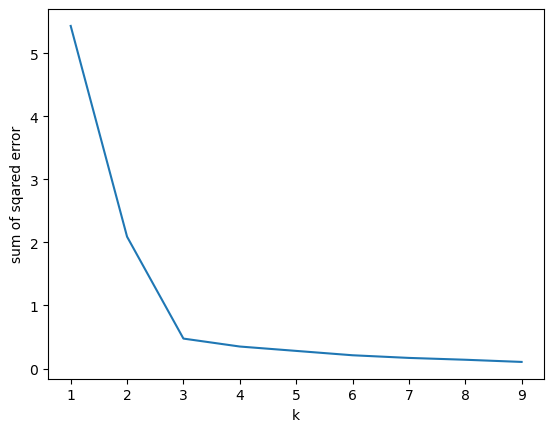

In [26]:
plt.xlabel('k')
plt.ylabel('sum of sqared error')
plt.plot(k_rng, sse)